In [13]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('PlayTennis.csv')

In [6]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [7]:
le = preprocessing.LabelEncoder()
data_df = pd.DataFrame(data)
data_df_encoded = data_df.apply(le.fit_transform)

In [8]:
X= data_df_encoded.drop(['Play Tennis'],axis=1)
y= data_df_encoded['Play Tennis']

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5,random_state=0)

In [10]:
model = GaussianNB()
nbtrain = model.fit(X_train, y_train)
y_pred = nbtrain.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


In [34]:
cm=confusion_matrix(y_test,y_pred)

Confusion Matrix
[[0 1]
 [2 4]]


Text(0.5, 1.0, 'Confusion Matrix')

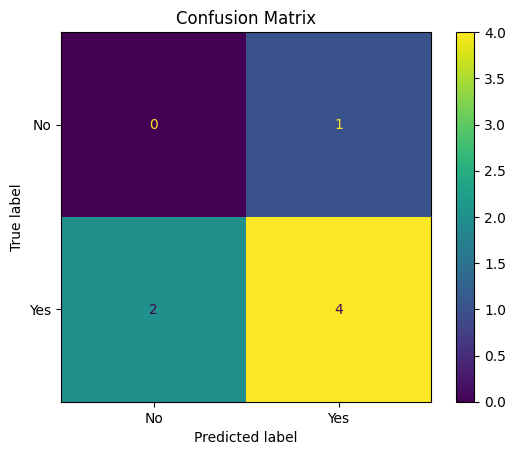

In [35]:
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No','Yes'])
print('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()
disp.plot()
disp.ax_.set_title("Confusion Matrix")